### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [10]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [11]:
# your code and solutions
# Read the CSV file into a DataFrame
data = pd.read_csv('The E-commerce Dataset.csv')

# Display the number of Null values in each column
print("Null values in each column:")
print(data.isnull().sum())

# length of the data before removing missing values
print("Length of data before removing missing values:", len(data))

# Remove records where gender/rating/helpfulness is missing
data_clean = data.dropna(subset = ['gender','rating','helpfulness'])


# Print the length of the data after removing missing values
print("Length of data after removing missing values:", len(data_clean))


#Check if there are any 'none' reviews and find their indices
# Drop rows with 'none' reviews
data_clean1 = data_clean.drop(data_clean.index[data_clean["review"] == "none"])
# Print the length of the data after removing missing values
print("Length of data after removing missing values:", len(data_clean1))


Null values in each column:
userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64
Length of data before removing missing values: 20000
Length of data after removing missing values: 19934
Length of data after removing missing values: 19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [12]:
# your code and solutions
# Q2.1: Total number of unique users, unique reviews, unique items, and unique categories
unique_users = data_clean1['userId'].nunique()
unique_reviews = data_clean1['review'].nunique()
unique_items = data_clean1['item'].nunique()
unique_categories = data_clean1['category'].nunique()

print("Total number of unique users:", unique_users)
print("Total number of unique reviews:", unique_reviews)
print("Total number of unique items:", unique_items)
print("Total number of unique categories:", unique_categories)



Total number of unique users: 8562
Total number of unique reviews: 19459
Total number of unique items: 89
Total number of unique categories: 9


In [13]:
# Q2.2: Descriptive statistics of all rating records
rating_stats = data_clean1['rating'].describe()
print(" Descriptive statistics of all rating records:")
print(rating_stats)

 Descriptive statistics of all rating records:
count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


In [14]:
# Q2.3: Descriptive statistics of the number of items rated by different genders
gender_item_grouped = data_clean1.groupby('gender')['item_id'].count().reset_index(name="count")
gender_item_stats = gender_item_grouped['count'].describe()
print(" Descriptive statistics of the number of items rated by different genders:")
print(gender_item_grouped)
print(gender_item_stats)



 Descriptive statistics of the number of items rated by different genders:
  gender  count
0      F   9793
1      M  10123
count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: count, dtype: float64


In [15]:
# Q2.4: Descriptive statistics of the number of ratings received by each item
item_rating_grouped = data_clean1.groupby('item_id')['rating'].count().reset_index(name="count")
item_rating_stat = item_rating_grouped['count'].describe()

print("Descriptive statistics of the number of ratings received by each item:")
print(item_rating_grouped)
print(item_rating_stat)


Descriptive statistics of the number of ratings received by each item:
    item_id  count
0         0    939
1         1    657
2         2    157
3         3    240
4         4    185
..      ...    ...
84       84    210
85       85    160
86       86    245
87       87    173
88       88    596

[89 rows x 2 columns]
count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: count, dtype: float64


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

<Figure size 600x500 with 0 Axes>

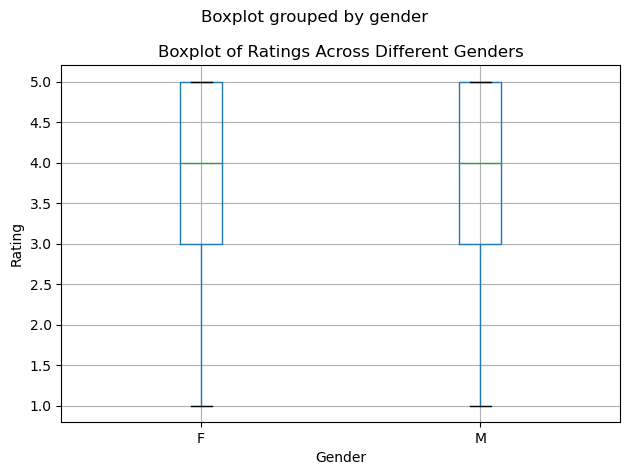

In [40]:
# your code and solutions
# Creating a box plot of ratings and  genders correlation
plt.show()
plt.figure(figsize=(6, 5))
data_clean1.boxplot(column='rating', by='gender')
plt.title('Boxplot of Ratings Across Different Genders')
plt.xlabel('Gender')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()


# Boxplot of Ratings across different genders
Here are the usefull insights from the graphs
1. The median and distribution for male and female data for ratings are the same in the box plot, it suggests that there are no significant differences in the ratings provided by males and females. 


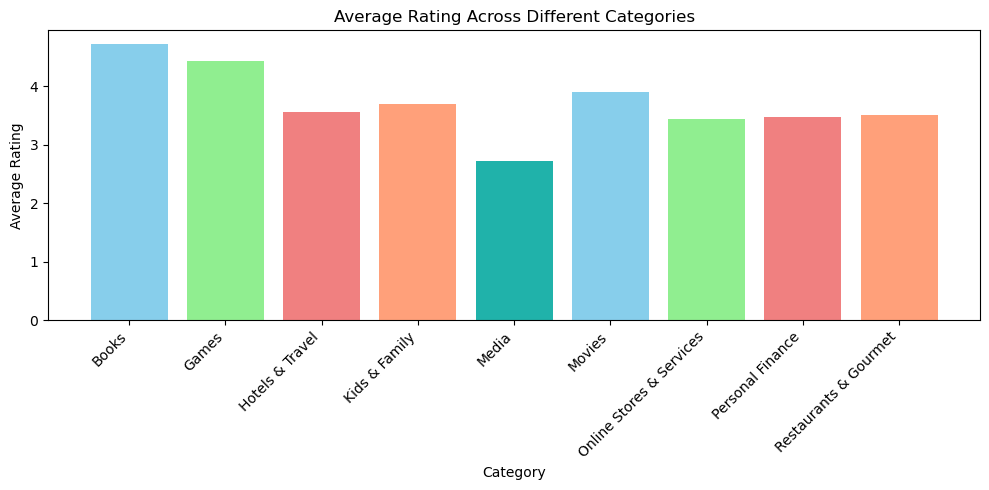

In [42]:
# Calculate average ratings for each category
average_ratings = data_clean1.groupby('category')['rating'].mean()

# Create a list of colors for each bar
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen']

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(average_ratings.index, average_ratings, color=colors)

# Set title and labels
plt.title('Average Rating Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Rating across different Categories
The insights from the bar chart are as follows:
1. Books has more positive rating than other categories and it makes it the most popular category. More users for books
2. Media has the lowest rating in all the categories and it makes it the least favourite category. Less users for Media
3. Resturants, personal finance and online store and services have same rating so they have equal number of users.
4. Games hold the second position in the rating
So, this tells us about the popularity of different categories


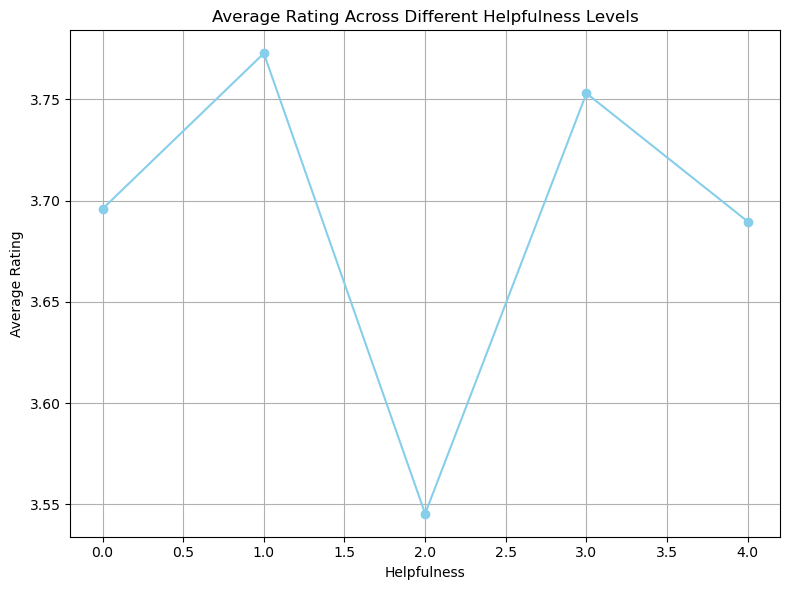

In [43]:
# Calculate average ratings for each helpfulness level
average_ratings_helpfulness = data_clean1.groupby('helpfulness')['rating'].mean()

# Create line chart
plt.figure(figsize=(8, 6))
plt.plot(average_ratings_helpfulness.index, average_ratings_helpfulness, marker='o', color='skyblue', linestyle='-')

# Set title and labels
plt.title('Average Rating Across Different Helpfulness Levels')
plt.xlabel('Helpfulness')
plt.ylabel('Average Rating')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Average rating across different helpfullness levels
Line plot among different helpfullness level shows some usefull insights:
1. For helpfullness level 1 we have the highest count of ratings.
2. For helpfullness level 2 we have the least count of ratings.
It shows us the most and least famous level of helpfullness

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [19]:
# Droppiing the indexes which has helpfulness<=2 and displaying the altered result
helpfulness_clean = data_clean1.drop(data_clean1.index[data_clean1["helpfulness"]<=2])
helpfulness_clean

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
6,33,32100,Go down under Mateys!!!!!,Outback Steakhouse,5.0,4.0,F,Restaurants & Gourmet,50,25.00,31
9,4053,22304,The best on the web.,Amazon.com,5.0,3.0,F,Online Stores & Services,3,129.82,22
...,...,...,...,...,...,...,...,...,...,...,...
19992,10805,11900,R.I.P,MTV,1.0,4.0,F,Media,39,138.00,18
19993,10805,12000,Leave them be...,Teletubbies,5.0,4.0,F,Kids & Family,76,48.25,18
19994,10805,50500,"Thank you, Drive Thru Please",McDonald's,3.0,3.0,F,Restaurants & Gourmet,41,30.74,18
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18


In [20]:
#Group users by their ids and counting the number of their ratings
data_user_rating = helpfulness_clean.groupby("userId").count()["item"].reset_index(name = "count")
data_user_rating

,userId,count
0,0,3
1,1,1
2,2,2
3,3,2
4,4,7
...,...,...
6530,10802,2
6531,10803,1
6532,10804,1
6533,10805,4


In [21]:
#Finding the number of users who have rated less than 7 items
list_user_less7 = data_user_rating[data_user_rating["count"]<7]["userId"].tolist()
list_user_less7

[0,
 1,
 2,
 3,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 39,
 40,
 42,
 43,
 44,
 47,
 48,
 49,
 53,
 54,
 55,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 76,
 77,
 79,
 80,
 83,
 84,
 85,
 88,
 90,
 93,
 94,
 95,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 112,
 113,
 115,
 117,
 118,
 121,
 123,
 124,
 125,
 126,
 127,
 129,
 130,
 132,
 133,
 136,
 138,
 139,
 141,
 142,
 144,
 145,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 164,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 174,
 176,
 177,
 181,
 182,
 183,
 184,
 186,
 187,
 189,
 190,
 191,
 193,
 194,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 215,
 217,
 219,
 220,
 222,
 223,
 224,
 225,
 227,
 228,
 230,
 231,
 234,
 236,
 237,
 238,
 239,
 240,
 242,
 246,
 247,
 248,
 250,
 251,
 252,
 

In [22]:
#Dropping the no of users who have rated less than 7 items
user_clean =helpfulness_clean.drop(helpfulness_clean.index[helpfulness_clean["userId"].isin(list_user_less7)])
user_clean

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [23]:
#Counting the number of items by their ratings and displaying it in a tabular form
item = user_clean.groupby("item").count()["rating"].reset_index(name = "count")
item

,item,count
0,AOL (America Online),93
1,All Advantage,72
2,Alta Vista (by 1stUp),10
3,Amazon.com,18
4,American Airlines,19
...,...,...
84,Wendy's,35
85,What Lies Beneath,28
86,X-Men,48
87,X.com,19


In [24]:
#Displaying the items which have recieved less than 11 ratings
list_item_less11 = item[item["count"]<11]["item"].tolist()
list_item_less11

['Alta Vista (by 1stUp)',
 'Earthlink',
 'Golden Eye 007 for Nintendo 64',
 'Luvs Ultra Leakguards Stretch',
 'Northwest Airlines',
 'Quicken Loans',
 'Sega Dreamcast Grey Console']

In [44]:
#Dropping the items which have recieved less than 11 ratings
item_clean = user_clean.drop(user_clean.index[user_clean["item"].isin(list_item_less11)])
item_clean


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [26]:
print("The length of data after all the preprocesing is", len(item_clean))

The length of data after all the preprocesing is 2685


In [39]:
item_clean.to_csv("clean_data.csv", index = False)
# Save the modified DataFrame back to the CSV file, overwriting the existing file
#item_clean.to_csv('The E-commerce Dataset.csv', index=False)